In [3]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
f = np.array([3.80, 4.00,4.20,4.39,4.60,4.70,4.80,4.91,5.00,5.20,5.25,5.30,5.39,5.59,5.80,6.00,6.20,6.39,6.60,6.80]) * 1e3 # Hz
Uout = np.array([0.540, 0.624, 0.708, 0.82, 0.940, 1.01, 1.06, 1.13, 1.16, 1.21, 1.21, 1.21, 1.19, 1.13, 1.04, 0.936, 0.856, 0.784, 0.720, 0.644]) # V

In [5]:
R = 996 # Ohm

<IPython.core.display.Javascript object>


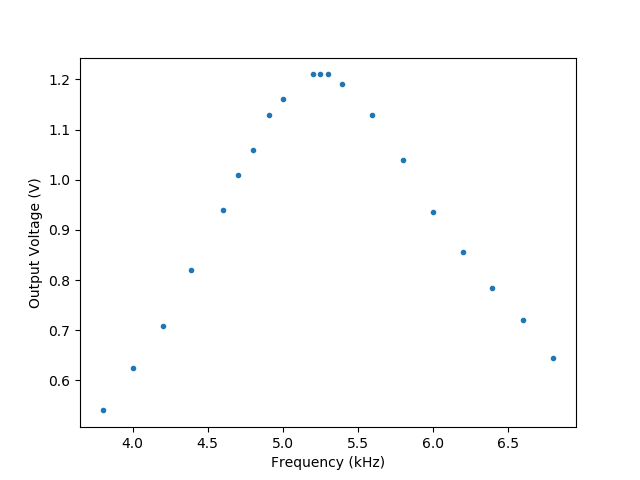

Text(0,0.5,'Output Voltage (V)')

In [6]:
plt.plot(f / 1e3, Uout, '.')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Output Voltage (V)')

In [7]:
def fitfunction(f, Uin, L, C):
    omega = 2 * np.pi * f
    Z1 = R
    Z2 = 1 / (1j * omega * C + 1 / (1j * omega * L))
    return Uin * np.abs(Z2 / (Z1 + Z2))

In [8]:
# guess values
Uing = 1.2 # V
Lg = 11 * 1e-3 # H
Cg = 100e-9 # F

# do the fit
popt, pcov = curve_fit(fitfunction, f, Uout, p0 = [Uing, Lg, Cg])

# fit values
Uinf = popt[0]
Lf = popt[1]
Cf = popt[2]

In [9]:
Uin_err, L_err, C_err = np.sqrt(np.diag(pcov))

In [10]:
print('Fit results:')
print('Uin = %1.3f +/- %1.3f V' % (Uinf, Uin_err))
print('L = %1.2f +/- %1.2f mH' % (Lf / 1e-3, L_err / 1e-3))
print('C = %1.0f +/- %1.0f nF' % (Cf / 1e-9, C_err / 1e-9))

Fit results:
Uin = 1.211 +/- 0.002 V
L = 10.00 +/- 0.06 mH
C = 92 +/- 1 nF


In [11]:
f_fit = np.linspace(np.min(f), np.max(f), 1000) # Hz

<IPython.core.display.Javascript object>


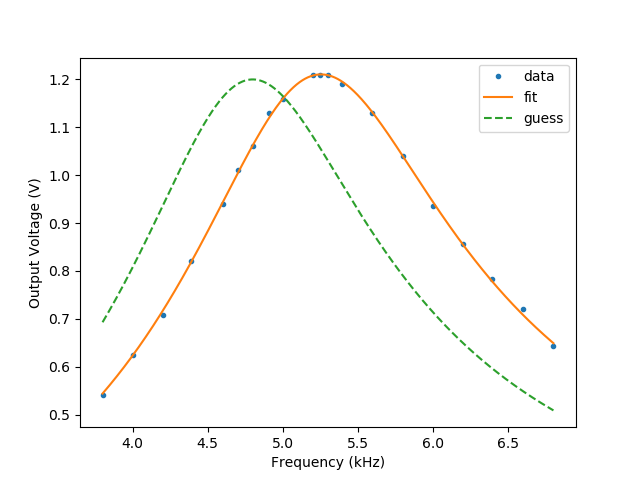

In [12]:
plt.plot(f / 1e3, Uout, '.', label='data')
plt.plot(f_fit / 1e3, fitfunction(f_fit, Uinf, Lf, Cf), label='fit')
plt.plot(f_fit / 1e3, fitfunction(f_fit, Uing, Lg, Cg), '--', label='guess')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Output Voltage (V)')
plt.legend()